In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck
from scipy import optimize

In [3]:
np.random.seed(100)

In [4]:
#True data points
def make_real_y(x, true_m=1.5, true_c=5., sigma=1.):
    true_y = true_m * x + true_c
    errs = np.random.normal(loc=0., scale=sigma, size=len(x))
    return true_y + errs

m = 2
c = 10.
sigma = 2.
x = np.arange(1, 20, 1)
y = make_real_y(x, m, c, sigma)

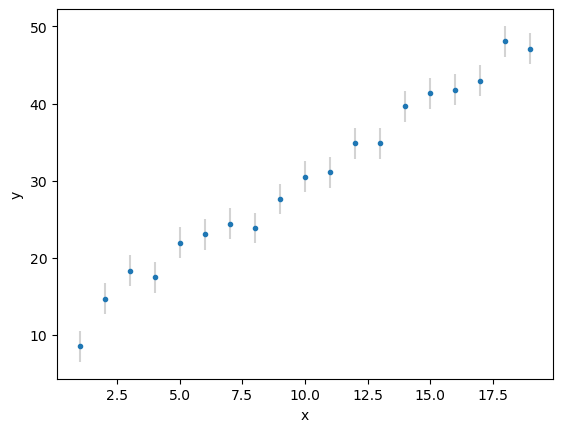

In [5]:
plt.errorbar(x, y, yerr=sigma, fmt='.', ecolor='LightGrey', label="Expected")
plt.xlabel("x")
plt.ylabel("y")
# plt.legend()
plt.show()

In [6]:
def log_likelihood(params):
    model_m, model_c = params

    y_m = model_m * x + model_c
        
    L = 0
    for y_i, y_m_i in zip(y, y_m):
        L += (-0.5 * ((y_i - y_m_i)**2 / sigma**2))
    L = L + (len(x) / 2) * np.log(2 * np.pi * sigma**2) 

    return L

def log_prior(params):
    model_m, model_c = params

    P = 0.
    if model_m > 30:
        P += -np.inf 

    return P

def log_prob(params):
    return -(log_likelihood(params) + log_prior(params))

In [7]:
guess = [1, 6]
likelihood_model = optimize.minimize(log_prob, guess)#, method='Nelder-Mead'
print(likelihood_model)

y_m = likelihood_model['x'][0] * x + likelihood_model['x'][1]
residual = y - y_m

      fun: -25.444419719688497
 hess_inv: array([[ 0.00703637, -0.07038297],
       [-0.07038297,  0.91450375]])
      jac: array([-2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([2.0224354 , 9.88561555])


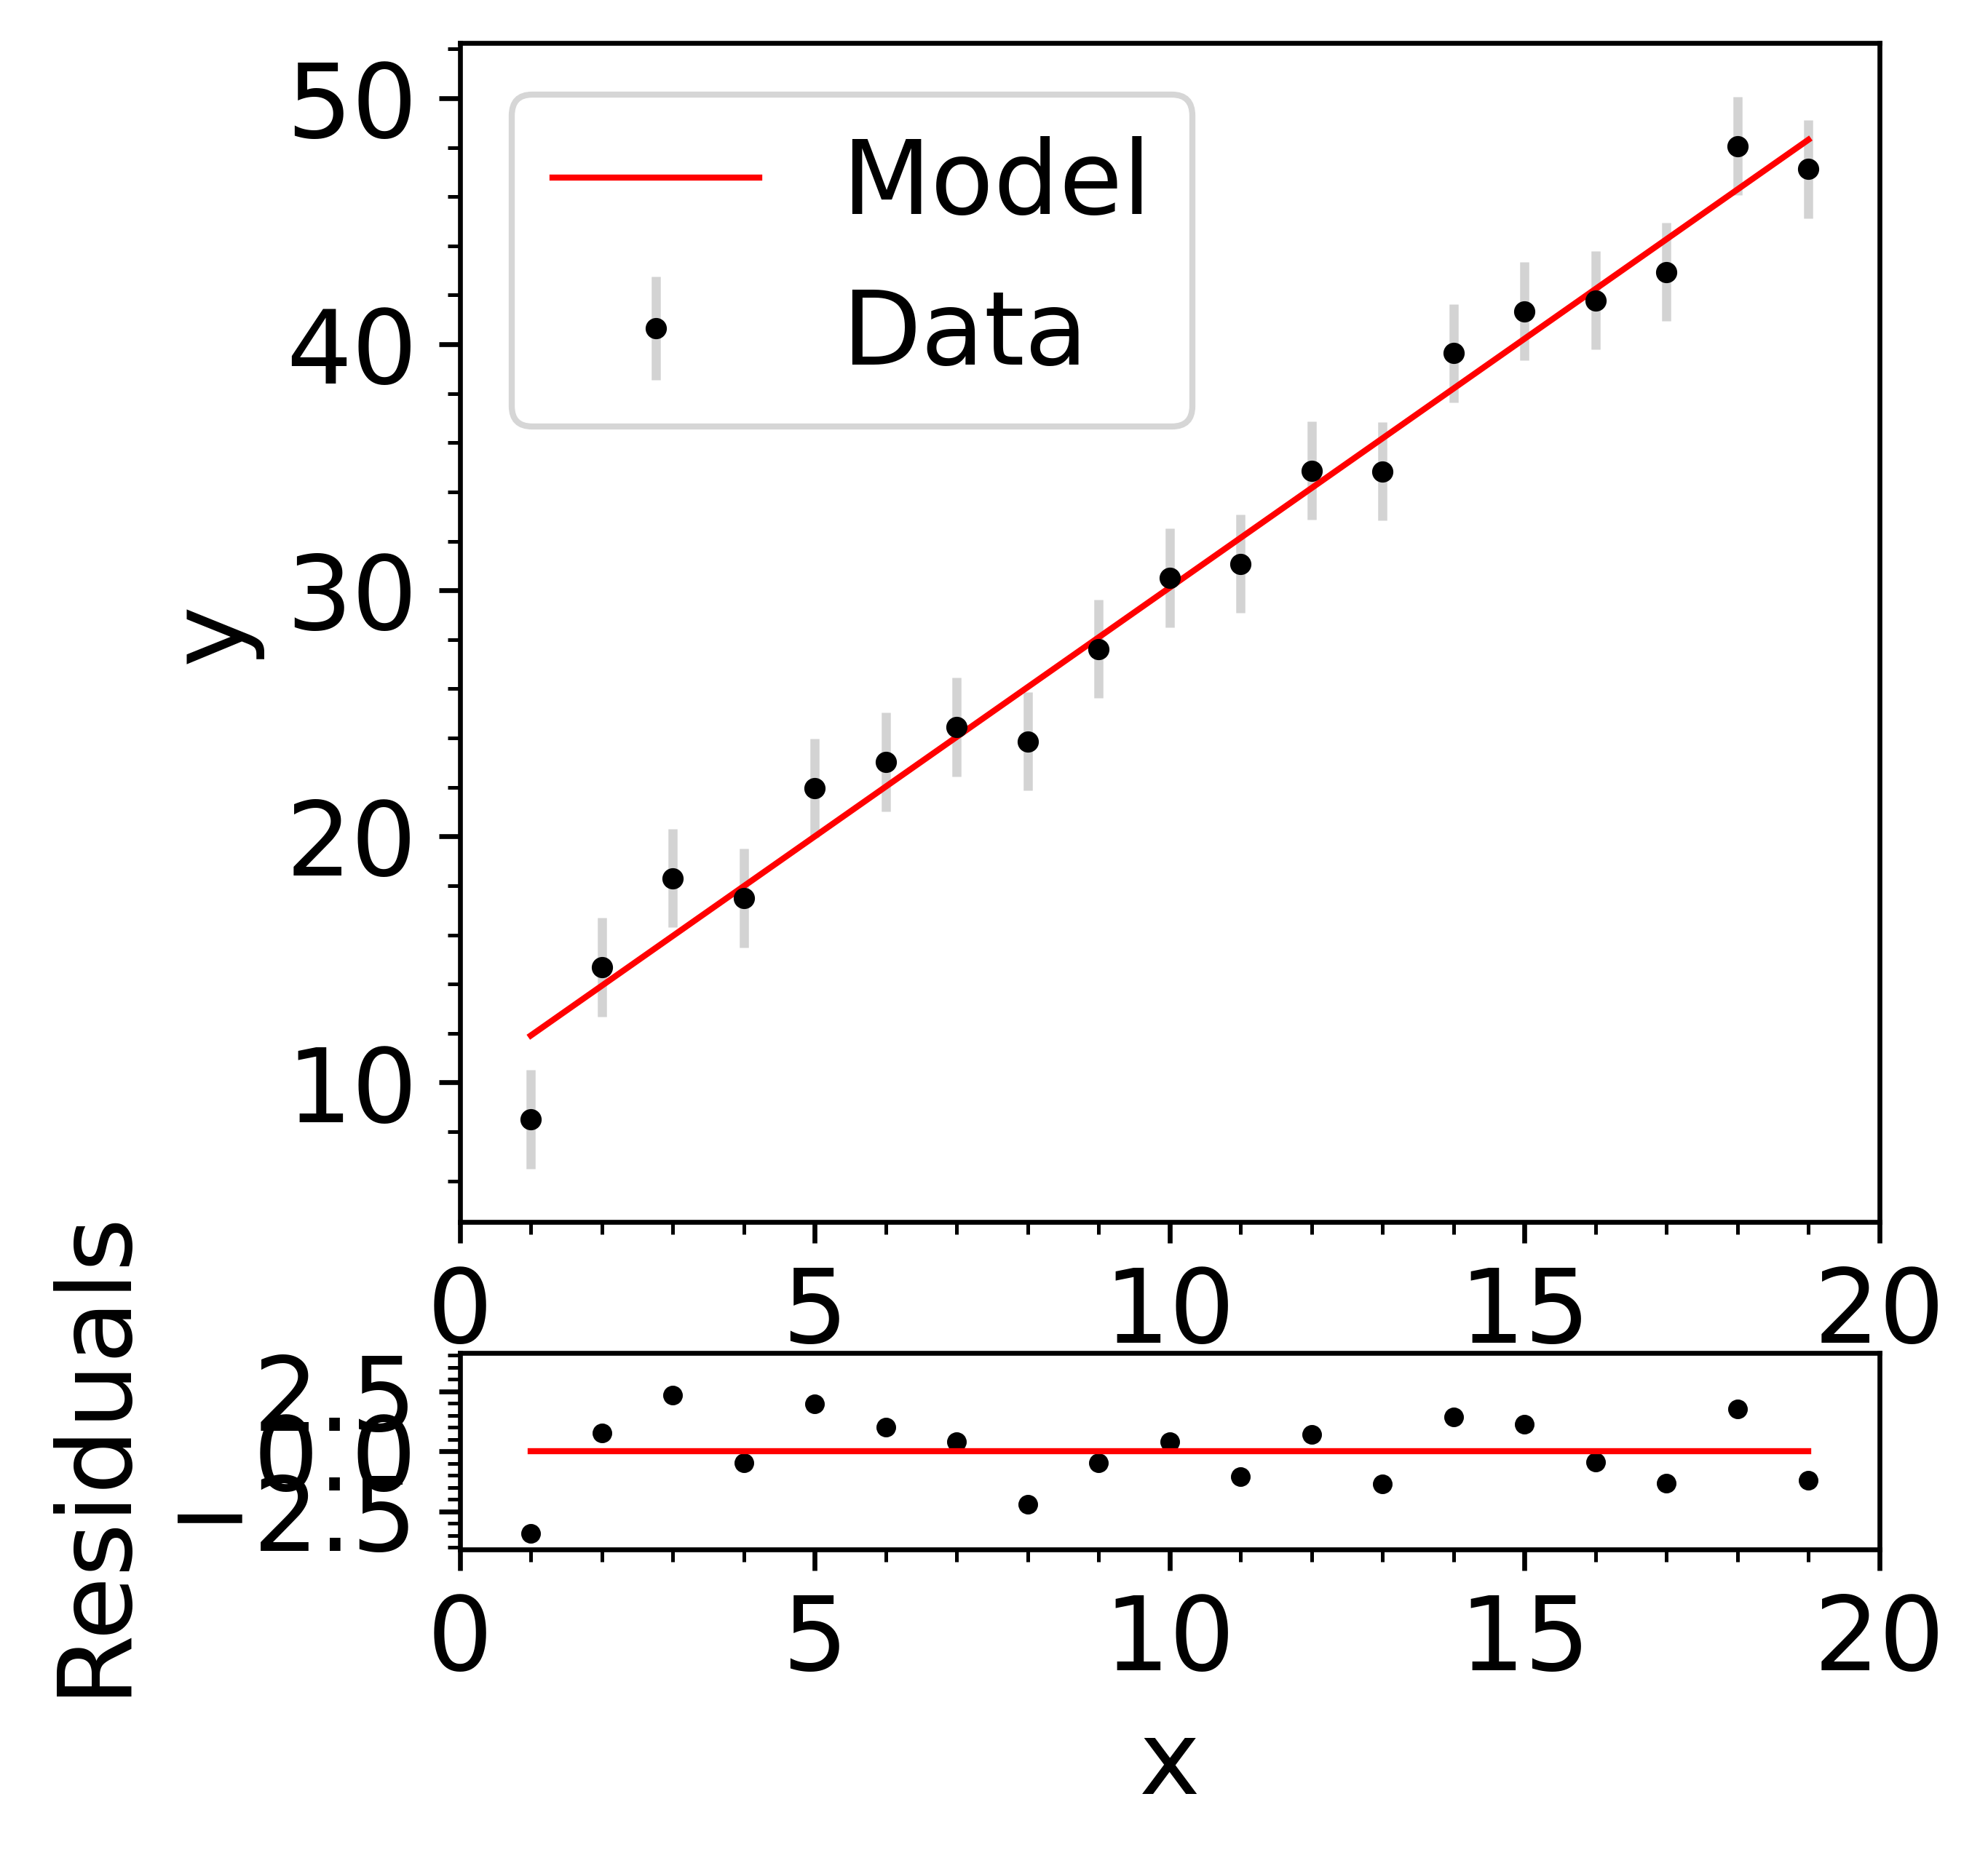

In [8]:
#Panel settings
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -1.15

rect = [left, bottom, width, height]
rect_res = [left, bottom+height+spacing, width, 0.15]

fig = plt.figure(figsize=(5, 3), dpi=600)
ax = fig.add_axes(rect)

ax_res = fig.add_axes(rect_res, sharex=ax)

#Top panel
ax.errorbar(x, y, yerr=sigma, fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data")
ax.plot(x, y_m, color='red',label="Model", lw=1)

ax.set(xlabel="x", ylabel="y")
ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)

ax.set_xlim((0, max(x)+1))
ax.legend(prop={'size': 17})

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())

ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)

#Bottom panel
ax_res.scatter(x, residual, color='black', s=5)
ax_res.set_ylim((-max(abs(residual))*1.2, max(abs(residual)*1.2)))
ax_res.plot([min(x), max(x)], [0, 0], color='red', lw=1)

ax_res.set(xlabel="x", ylabel="Residuals")
ax_res.xaxis.label.set_size(17)
ax_res.yaxis.label.set_size(17)

ax_res.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax_res.yaxis.set_minor_locator(tck.AutoMinorLocator())

ax_res.xaxis.set_tick_params(labelsize=17)
ax_res.yaxis.set_tick_params(labelsize=17)

# fig.subplots_adjust(hspace=0.1)
plt.show()

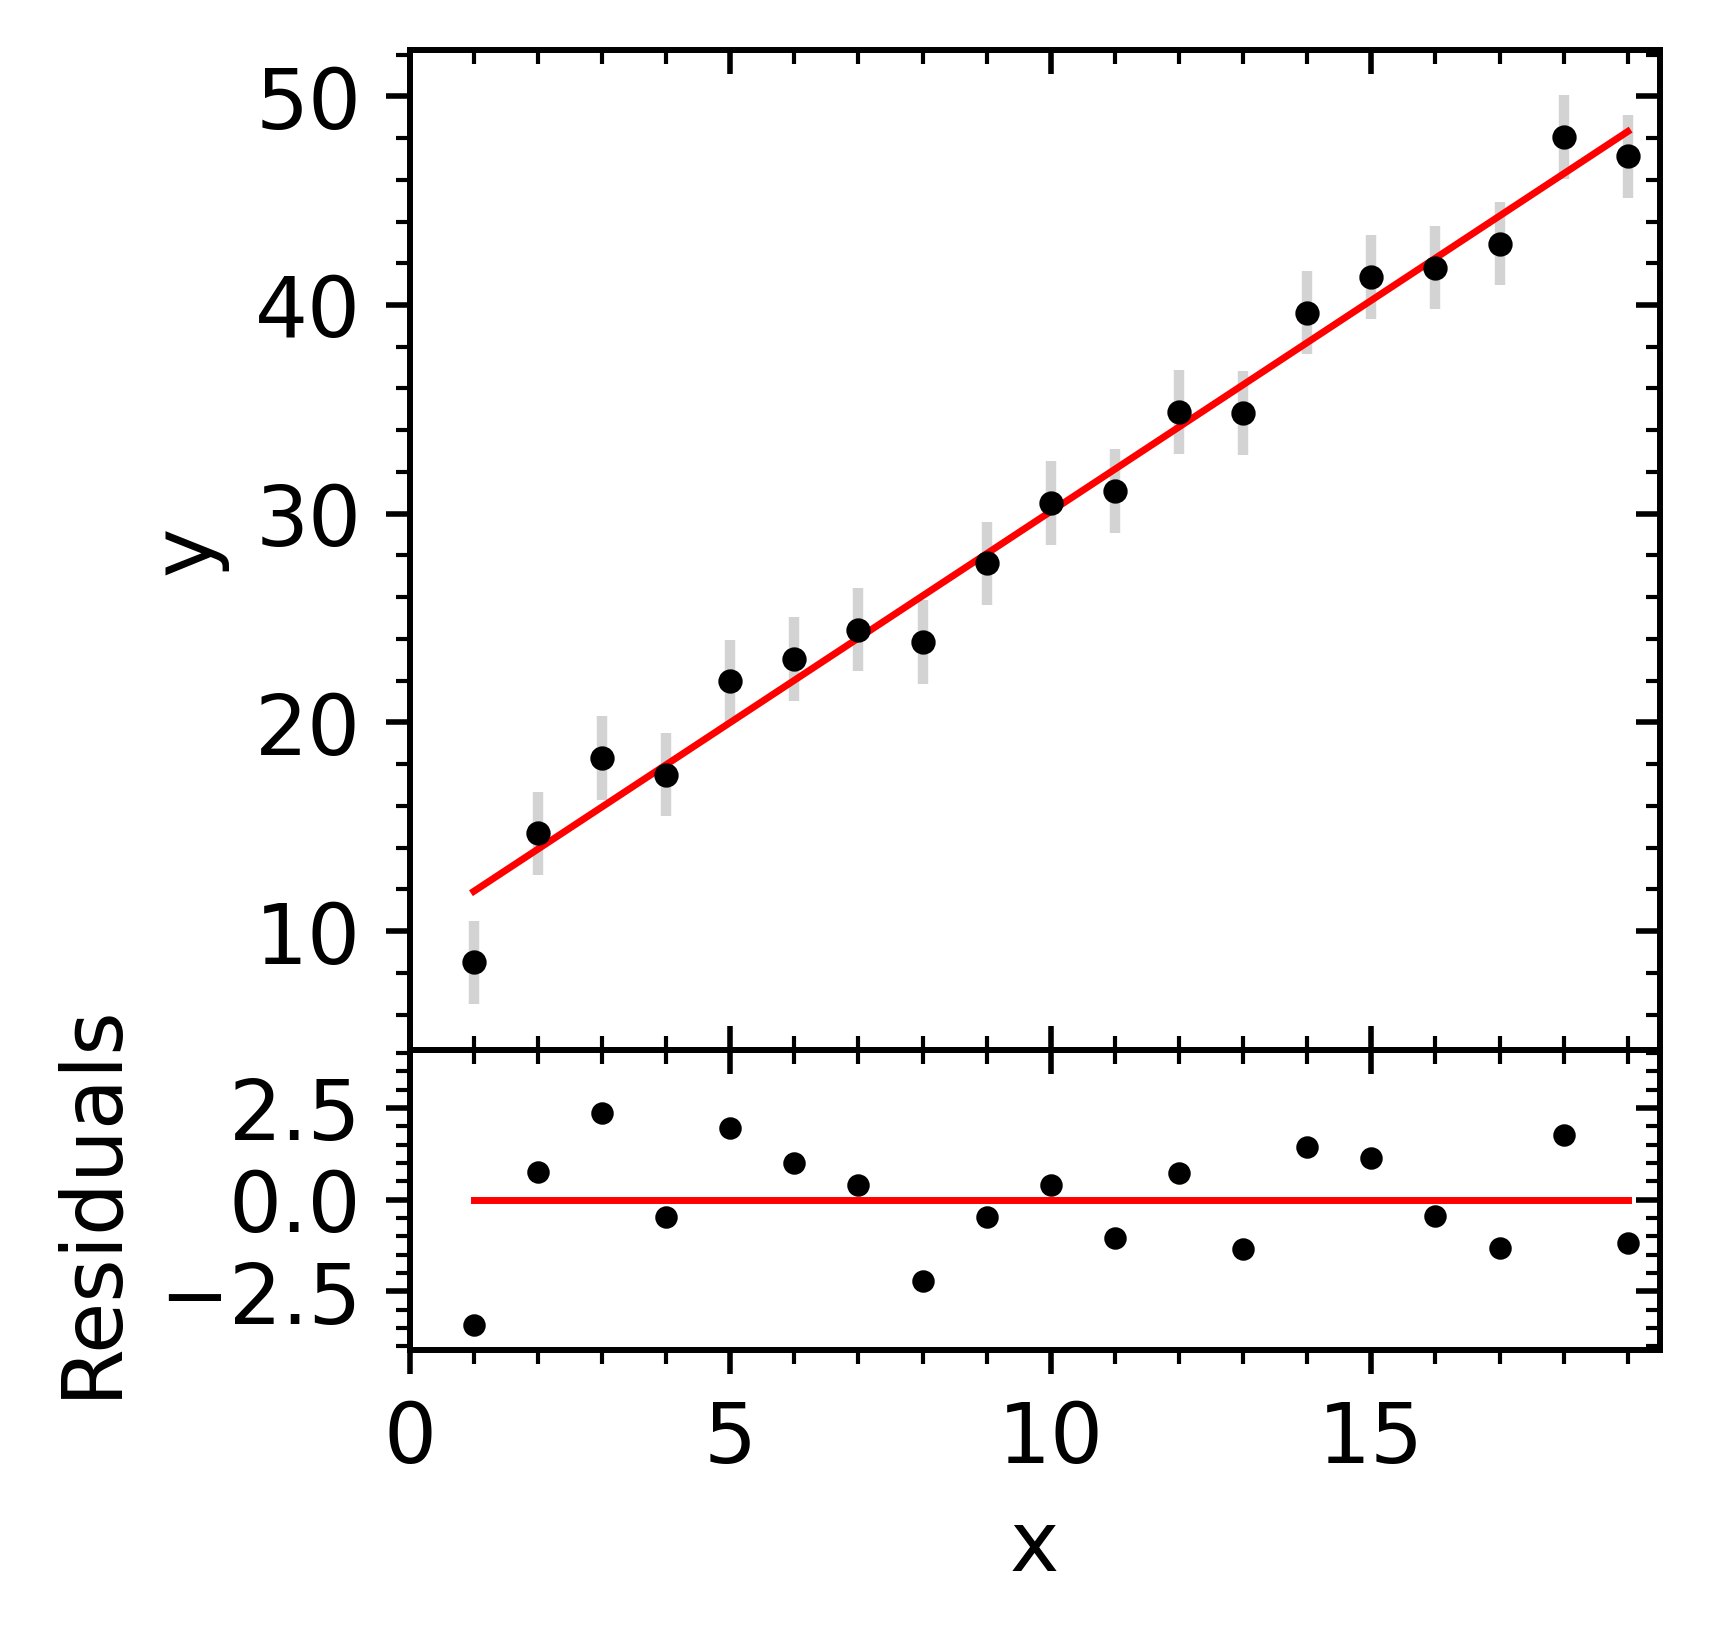

In [22]:
fontsize = 12

#Panel settings
left = 0.1
bottom = 0.1
width = 0.5
height = 0.5
spacing = -0.65

rect = [left, bottom, width, height]
rect_res = [left, bottom+height+spacing, width, 0.15]

fig = plt.figure(figsize=(5, 4), dpi=500)
ax = fig.add_axes(rect)
ax_res = fig.add_axes(rect_res)

#Top panel
ax.errorbar(x, y, yerr=sigma, fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data")
ax.plot(x, y_m, color='red',label="Model", lw=1)
ax.set_xlim(0, max(x)+0.5)
ax.get_xaxis().set_ticklabels([])
ax.tick_params(axis="x", which="both", direction="in")

ax.set(xlabel="", ylabel="y")
ax.xaxis.label.set_size(fontsize)
ax.yaxis.label.set_size(fontsize)



# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.get_xaxis().set_ticklabels([])
axx.tick_params(which="both", direction="in")

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())
axy.yaxis.set_minor_locator(tck.AutoMinorLocator())


ax.yaxis.set_tick_params(labelsize=fontsize)

#Bottom panel
ax_res.scatter(x, residual, color='black', s=5)
ax_res.set_xlim(ax.get_xlim())
ax_res.plot([min(x), max(x)], [0, 0], color='red', lw=1)
ax_res.set_ylim((-max(abs(residual))*1.2, max(abs(residual)*1.2)))


ax_res.set(xlabel="x", ylabel="Residuals")
ax_res.xaxis.label.set_size(fontsize)
ax_res.yaxis.label.set_size(fontsize)
ax_res.xaxis.set_tick_params(labelsize=fontsize)
ax_res.yaxis.set_tick_params(labelsize=fontsize)

# Mirror y
ax_res_y = ax_res.twinx()
ax_res_y.set_ylim(ax_res.get_ylim())
ax_res_y.get_yaxis().set_ticklabels([])
ax_res_y.tick_params(which="both", direction="in")

# Mirror x
ax_res_x = ax_res.twiny()
ax_res_x.set_xlim(ax_res.get_xlim())
ax_res_x.get_xaxis().set_ticklabels([])
ax_res_x.tick_params(which="both", direction="in")

ax_res.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax_res_x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax_res.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax_res_y.yaxis.set_minor_locator(tck.AutoMinorLocator())


# fig.subplots_adjust(hspace=0.1)
# ax.legend(prop={'size': 17})
plt.show()